<a href="https://colab.research.google.com/github/kanchankujur4/COMPINES_ALL/blob/main/untitied20_Copy_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/Demo image filters .zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sample_data')
zip_ref.close()

In [ ]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.4.1
Keras Version: 2.4.0

Python 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
Pandas 1.1.5
Scikit-Learn 0.22.2.post1
GPU is available


In [ ]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from random import randint

import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import Model, layers
from keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
import cv2
from IPython.display import Image

import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
print("Setup Complete!")

Setup Complete!


In [ ]:
################################ Transfer learning using pre train model ###############################

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from IPython.display import Image
from keras.utils import plot_model

In [ ]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0

    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3

        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)

    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}

    return labels[class_code]

print("Setup Complete!")

Setup Complete!


In [ ]:

Images, Labels = get_images(r'/content/sample_data/Demo image/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

print("Setup Complete!")


Setup Complete!


In [ ]:


print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)


Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


plot Complete!


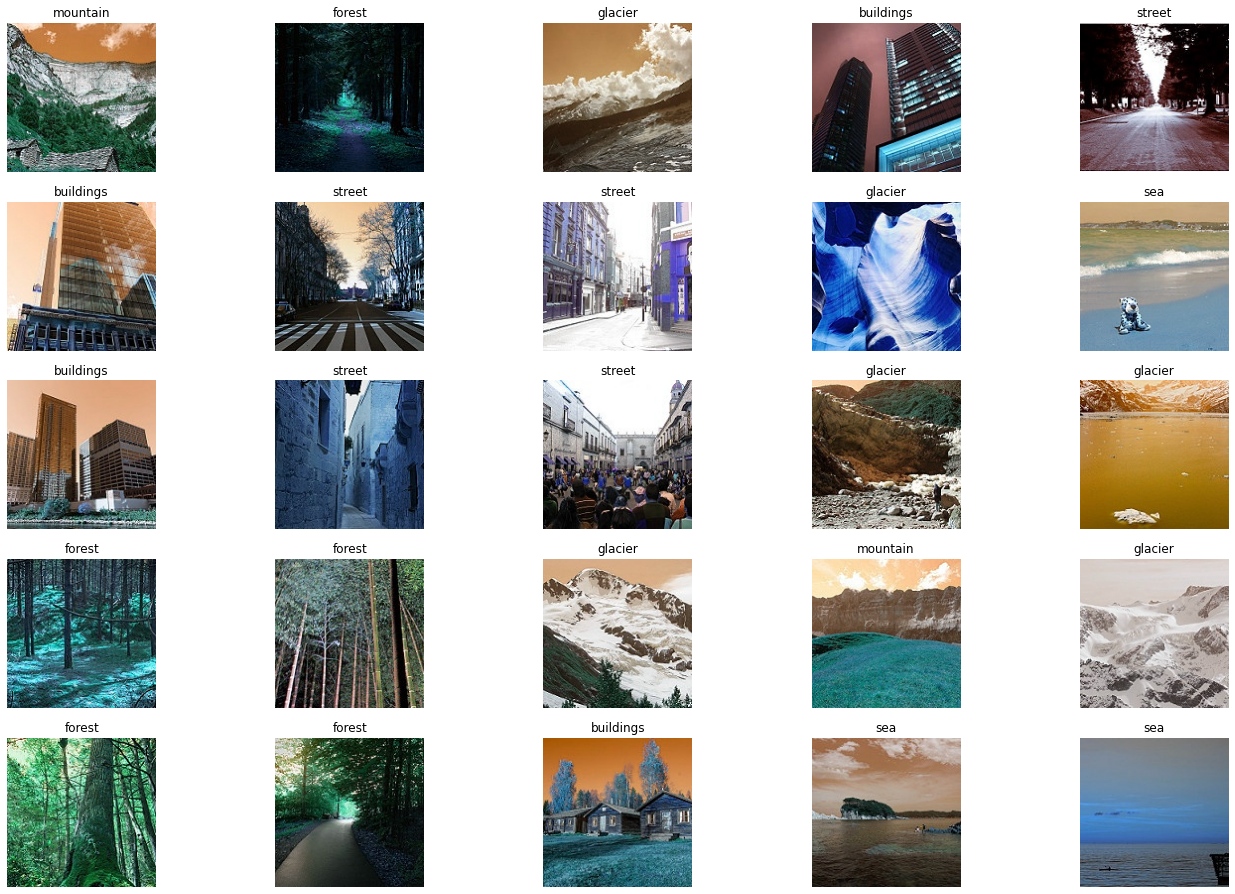

In [ ]:
#plot the train image
f,ax = plt.subplots(5,5)
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

print("plot Complete!")

In [ ]:
Dir_folder='/content/sample_data/Demo image'
data_dir=os.listdir(Dir_folder)
print(data_dir)
print("working")

['seg_train', 'seg_test', 'seg_pred']
working


In [ ]:
print("train images & classes")
train_DIR = "/content/sample_data/Demo image/seg_train/seg_train"

train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          vertical_flip=True,
                                          fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(train_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(250, 250))
print("test images & classes")
test_DIR = "/content/sample_data/Demo image/seg_test/seg_test"
validation_datagen = ImageDataGenerator(rescale = 1.0/255)


validation_generator = validation_datagen.flow_from_directory(test_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(250, 250))
print("working")

train images & classes
Found 14034 images belonging to 6 classes.
test images & classes
Found 3000 images belonging to 6 classes.
working


In [ ]:
print(validation_generator.class_indices)
class2index = validation_generator.class_indices

index2class = {v: k for k, v in class2index.items()}
print(index2class)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
{0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}


In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [ ]:
IMAGE_SIZE = [250, 250]

train_path = r"/content/sample_data/Demo image/seg_train/seg_train"
valid_path = r"/content/sample_data/Demo image/seg_test/seg_test"

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
last_layer = vgg.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu)(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense  (6, activation = tf.nn.softmax)(x)

model = tf.keras.Model( vgg.input, output)

model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.RMSprop(lr=0.0001), metrics=['acc'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)       0   

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

earlystop = EarlyStopping( patience=10, monitor='val_acc', min_delta=0,  verbose=0,
    mode='auto')


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=5,min_delta=0, mode="auto",
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.003,validation_data=(Images,Labels))



callbacks = [earlystop,learning_rate_reduction,]
print("callbacks working")

callbacks working


In [ ]:
'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''
# fit the model
vgg=model.fit(train_generator,
  validation_data=validation_generator,
  epochs=35,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator),
              callbacks = [callbacks]    )

Epoch 1/35
439/439 [==============================] - 210s 477ms/step - loss: 1.0599 - acc: 0.6252 - val_loss: 0.6883 - val_acc: 0.7277
Epoch 2/35
439/439 [==============================] - 208s 474ms/step - loss: 0.5750 - acc: 0.7778 - val_loss: 0.4187 - val_acc: 0.8427
Epoch 3/35
439/439 [==============================] - 209s 477ms/step - loss: 0.5051 - acc: 0.8023 - val_loss: 0.3814 - val_acc: 0.8633
Epoch 4/35
439/439 [==============================] - 209s 476ms/step - loss: 0.4887 - acc: 0.8161 - val_loss: 0.3833 - val_acc: 0.8567
Epoch 5/35
439/439 [==============================] - 209s 477ms/step - loss: 0.4575 - acc: 0.8337 - val_loss: 0.4273 - val_acc: 0.8427
Epoch 6/35
439/439 [==============================] - 209s 477ms/step - loss: 0.4555 - acc: 0.8321 - val_loss: 0.3846 - val_acc: 0.8573
Epoch 7/35
439/439 [==============================] - 209s 477ms/step - loss: 0.4280 - acc: 0.8442 - val_loss: 0.3481 - val_acc: 0.8793
Epoch 8/35
439/439 [============================

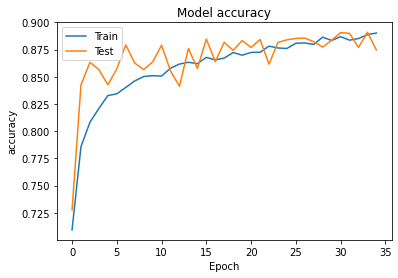

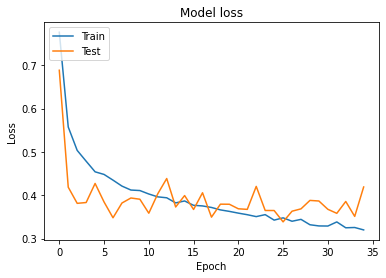

In [ ]:
#accuracy
plot.plot(vgg.history['acc'])
plot.plot(vgg.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()
#loss
plot.plot(vgg.history['loss'])
plot.plot(vgg.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:
#evaluate the model performance
test_loss , test_accuracy = model.evaluate(train_generator,verbose=1)


439/439 [==============================] - 192s 436ms/step - loss: 0.2900 - acc: 0.8964


Prediction for this image is : mountain


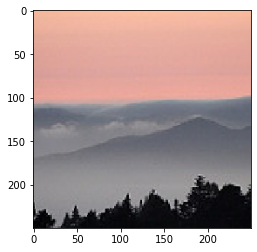

In [ ]:
import numpy as np
from keras.preprocessing import image

file_path =  '/content/sample_data/Demo image/seg_pred/seg_pred/10047.jpg'

test_image = image.load_img(file_path, target_size = (250, 250))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

classes=train_generator.class_indices

classes=['buildings','forest','glacier','mountain','sea','street']

print("Prediction for this image is :",classes[np.argmax(result)])

In [ ]:
#########################################################################################################

In [ ]:
# Save the model
# serialize model to JSON
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1.h5")
#################################
print("model saved")

model saved
